## Predicting Diabetes Using Machine Learning

## 1. Problem Definition

In a statement, Given clinical parameter about a patient, can we predict whether or not they have diabetes?


## 2. Data Source:

This data set is originally from the N. Inst. of Diabetes & Diges. & Kidney Dis.

The version that I'm using can found in Kaggle. https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data


## 3. Features
Data Dictionary

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)



### Import Libraries

In [17]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Libraries of models from Scikit-learn 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

### Data Loading and Preparation

Load the diabetes dataset into a pandas DataFrame

In [18]:
df = pd.read_csv("diabetes.csv")

### Exploratory Data Analysis (EDA) and Cleaning:

In this step, I am checking for missing values, data types, and potential duplicates to ensure the dataset is clean.

The purpose is to understand the structure of the data, check for missing values, duplicates, and summary statistics to prepare for modeling.

In [19]:
# Checking basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
# Checking for any missing values in the diabetes dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# Check for duplicate rows
df.duplicated().sum()

0

In [23]:
# Changing the "Outcome" column to "target" from the diabetes dataframe
df["target"] = df["Outcome"]
df.drop("Outcome", axis=1, inplace=True)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Visualization using graphs

In this step, we visualize relationships within the data and perform basic statistical analysis. This helps you understand data distribution, correlations between features, and potential outliers.

The purpose is to understand the relationships and distribution of key features that can be important for predicting diabetes and highlight trends in the data.


### Correlation Matrix

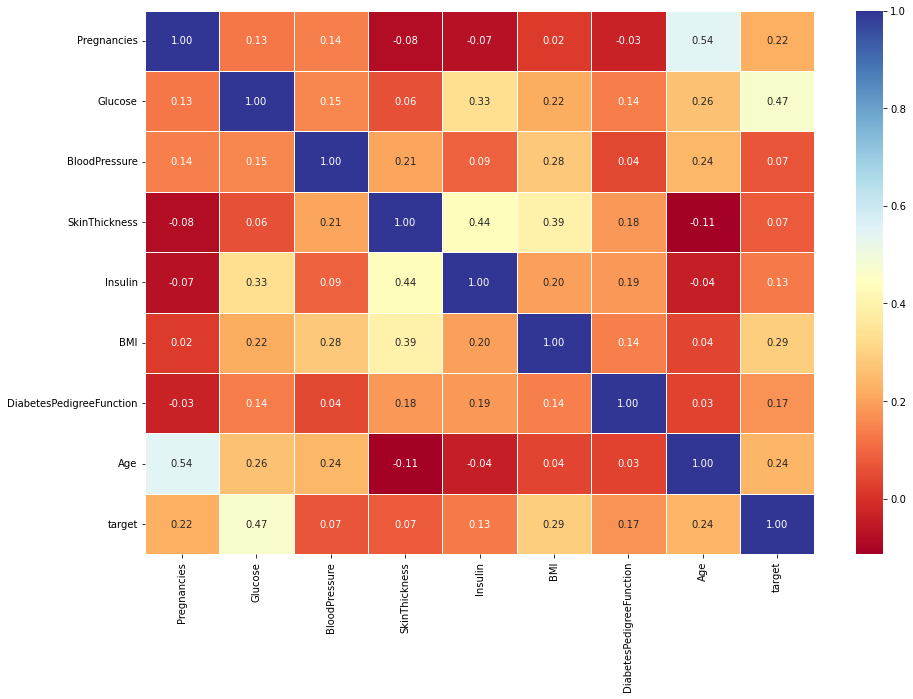

In [24]:
# correlation matrix for the diabetes dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdYlBu");

### Bar Graph

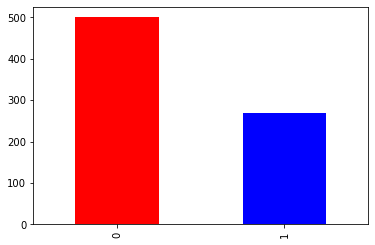

In [25]:
# Bar Graph of 'target' column 0 = no disease, 1 = disease
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

### Histogram

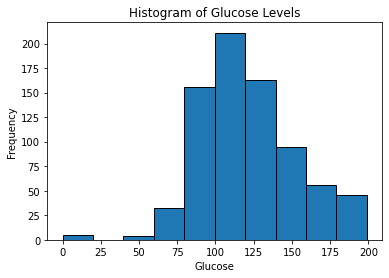

In [26]:
# Histogram of glucose levels
plt.hist(df["Glucose"], bins=10, edgecolor="black")
plt.title("Histogram of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

### Box, Count, and Distribution Plot

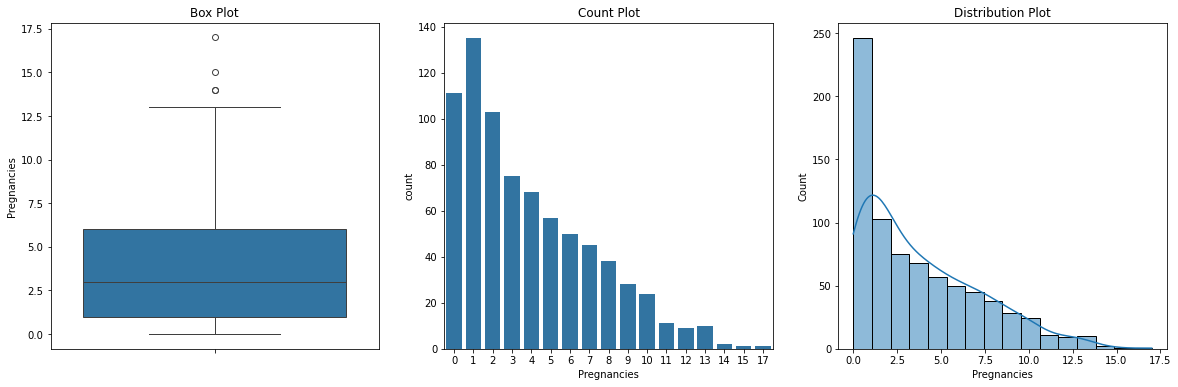

In [27]:

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title('Box Plot')
sns.boxplot(y=df['Pregnancies'])

plt.subplot(1, 3, 2)
plt.title('Count Plot')
sns.countplot(x='Pregnancies', data=df)


plt.subplot(1, 3, 3)
plt.title('Distribution Plot')
sns.histplot(df["Pregnancies"], kde=True)

plt.show()

### Line Graph

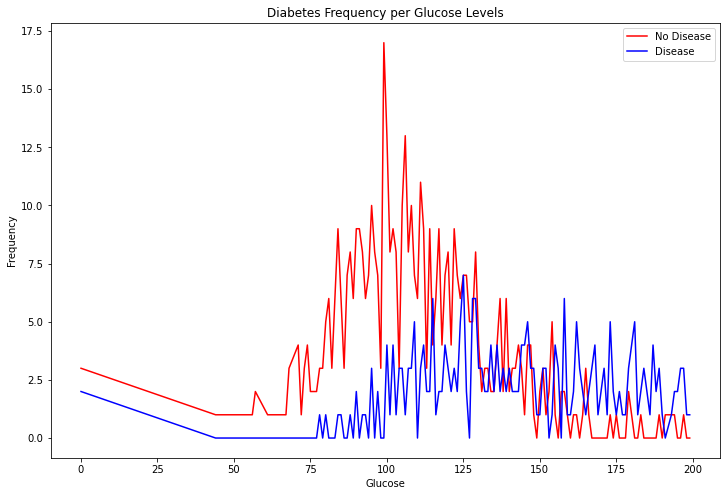

In [28]:
# Comparte Glucose and Target using pd.crosstab()
diabetes_crosstab = pd.crosstab(df["Glucose"], df["target"])

# Plot the line graph
diabetes_crosstab.plot(kind="line", figsize=(12, 8), color=['red', 'blue'])

# labels and titles
plt.title("Diabetes Frequency per Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel('Frequency')
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

# Show the plot
plt.show();

### Bar Graph

A bar graph to describe possible correlations of having diabetes due to the number of times being pregnant


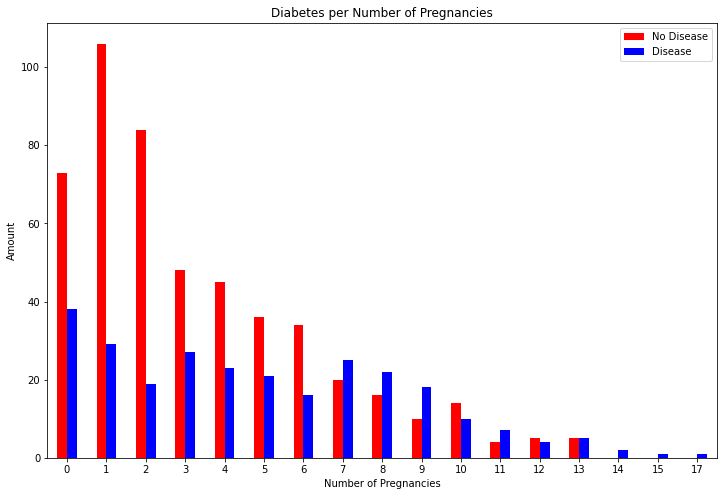

In [29]:
# Comparing pregnancies column with target column
pd.crosstab(df["Pregnancies"], df["target"]).plot(kind="bar",
                                                              figsize=(12, 8),
                                                              color=['red', 'blue'])
# labels and titles
plt.title("Diabetes per Number of Pregnancies")
plt.xlabel("Number of Pregnancies")
plt.ylabel('Amount')
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Correlogram

A correlogram to visualize distributions and correlations of and between multiple variables

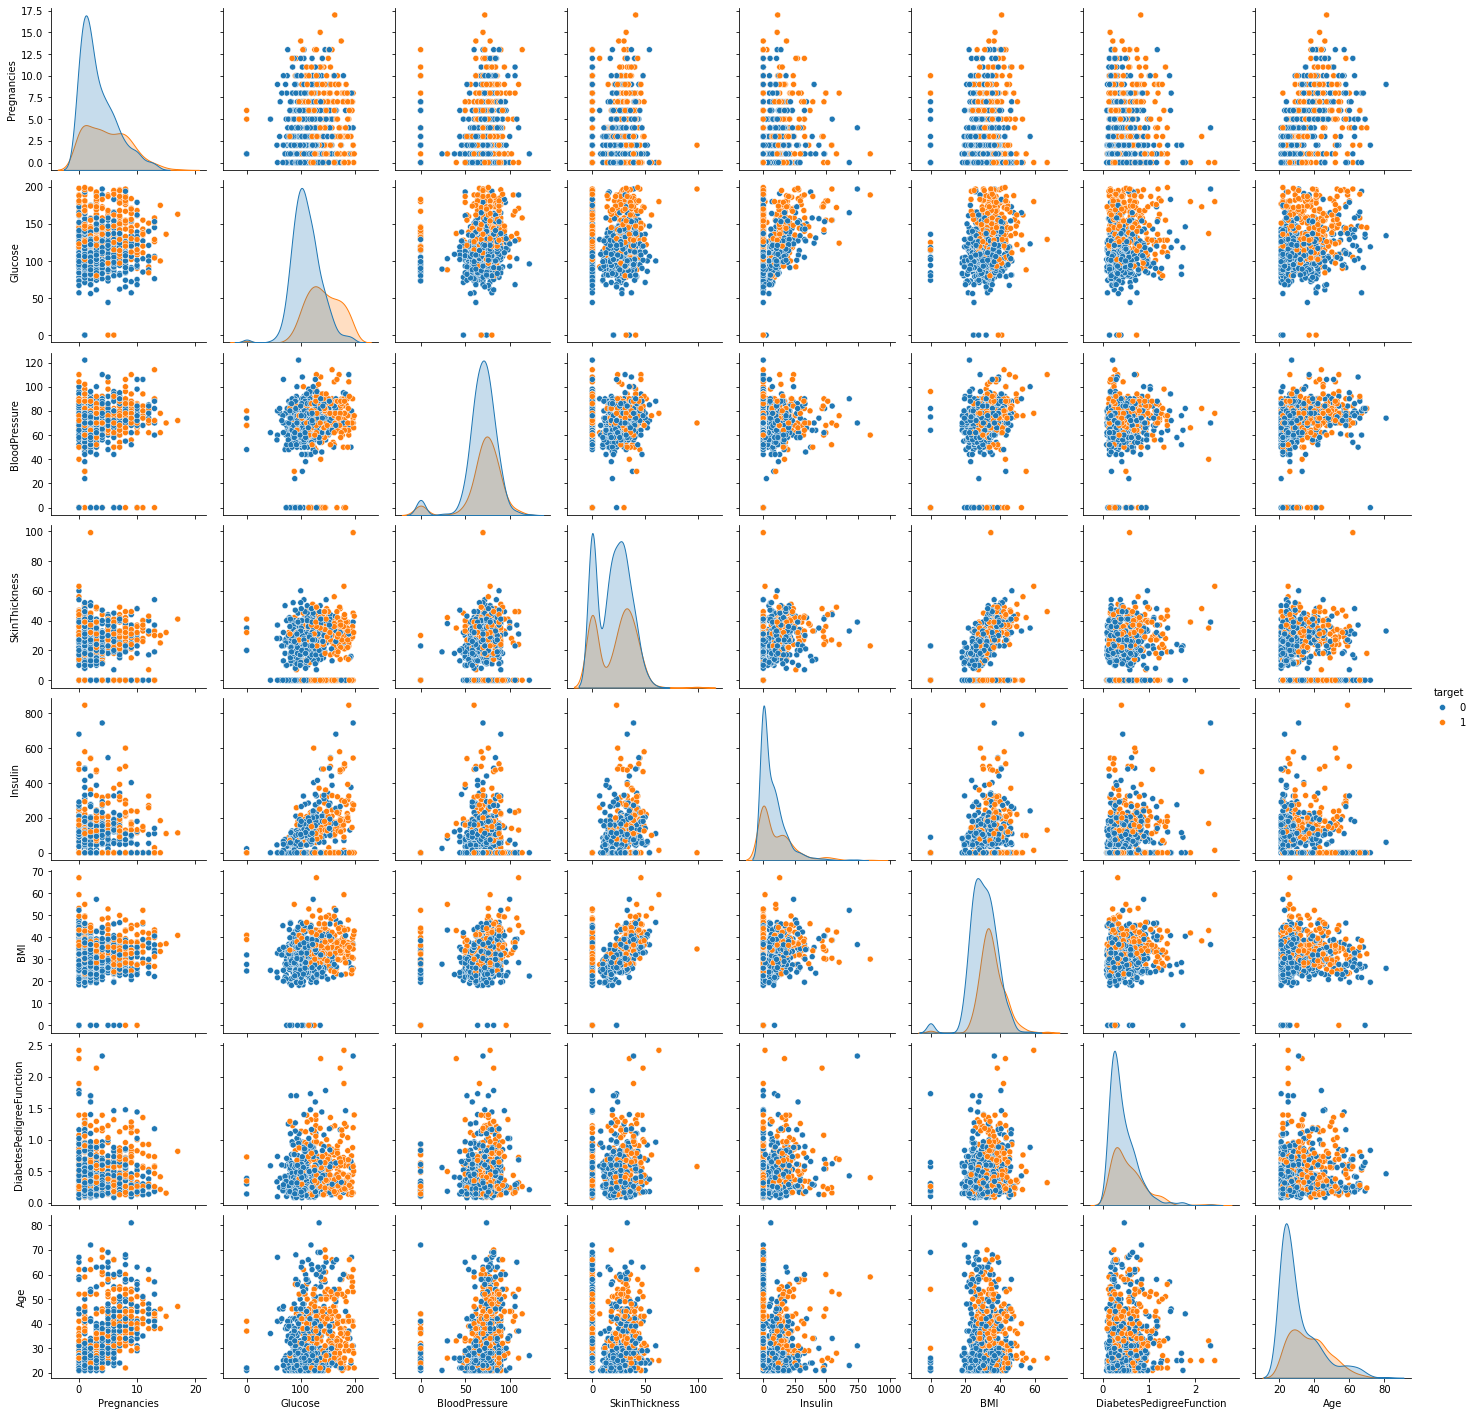

In [30]:
sns.pairplot(df, hue='target')
plt.show()

## Data Splitting

Next, I will split the data into training and testing sets to ensure that it the model's performance can be evaluated on unseen data after training

In [31]:
# Split data into X and y 
X = df.drop("target", axis=1)
y = df["target"]


# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Model Selection and Initial Training

At this stage, multiple machine learning models (Logistic Regression, Support Vector Classifier (SVC), and K-Nearest Neighbors (KNN)) are trained using the training data

In [32]:
# Assigning variables to machine learning models
SVC_model = SVC()
log_reg_model = LogisticRegression()
KNN_model = KNeighborsClassifier()

# Assinging variable to random seed
random_seed = np.random.seed(42)

# Put the models into a dictionary
models= {"SVC": SVC_model,
        "Logistic Regression": log_reg_model,
        "KNN": KNN_model
        }

# Creating a function that will fit and score the models dictionary
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set the random seed by passing random_seed variable
    random_seed
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

# This will give us the results for our machine learning algorithms
model_scores = fit_and_score(models,
                            X_train,
                            X_test,
                            y_train,
                            y_test)

model_scores

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'SVC': 0.7727272727272727,
 'Logistic Regression': 0.7987012987012987,
 'KNN': 0.7337662337662337}

### Bar Graph 

Bar graph comparing the three models

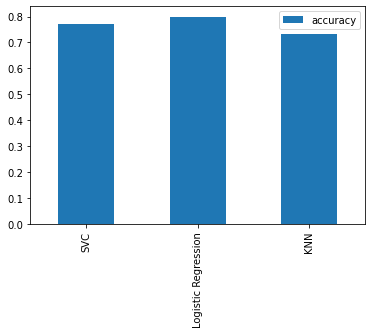

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter Tuning

Now that I have the initial results, the next step is to fine-tune the two models that had the best performance (Support Vector Classifier (SVC) and Logistic Regression) using GridSearchCV and RandomizedSearchCV

### Hyperparameter Tuning using RandomizedSearchCV

In [34]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver":["liblinear"]}

"""
C: Regularization Parameter. The strength of the regularization is inversely proportional to C.
Kernel: Specifies the kernel type to be used in the algorithm.
gamma: Kernel coefficient.
"""
svc_grid = {
    "C": np.logspace(-3, 3, 7),
    "kernel": ['linear', "rbf"],
    "gamma": ["scale", "auto"],
}

In [35]:
# Tune LogisticRegression
random_seed

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(log_reg_model,
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose= True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
# Checking for the randomizedSearchCV Logistic Regression best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.3738237958832638}

In [37]:
# Checking for RandomizedSearchCV Logistic Regression score
rs_log_reg.score(X_test, y_test)

0.7597402597402597

In [38]:
#SVC()
# Setup Random seed 
random_seed

# Setup random hyperparameter search for LogisticRegression
rs_svc = RandomizedSearchCV(SVC_model,
                               param_distributions=svc_grid,
                               cv = 5,
                               n_iter=20,
                               verbose= True)

rs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   verbose=True)

In [39]:
# Checking for the RandomizedSearchCV SVC best parameters
rs_svc.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 1.0}

In [40]:
# Checking for RandomizedSearchCV SVC score
rs_svc.score(X_test, y_test)

0.7727272727272727

### GridSearchCV

In [41]:
# LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# setup GridSearchCV for LogisticRegression
gs_log_reg = GridSearchCV(log_reg_model,
                         param_grid =log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [42]:
gs_log_reg.score(X_test, y_test)

0.7597402597402597

In [43]:
# Setup Random seed 
random_seed

# Setup random hyperparameter search for LogisticRegression
gs_svc = GridSearchCV(SVC_model,
                               param_grid=svc_grid,
                               cv = 5,
                               verbose= True)

gs_svc.fit(X_train, y_train)
gs_svc.score(X_test, y_test)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


0.7727272727272727

## Model Evaluation

Evaluating the performance of the tuned models using various metrics such as the confusion matrix, precision, recall, and F1-score

In [44]:
# Predict on the test set using the tuned SVC model
y_preds = rs_svc.predict(X_test)

# Confusion matrix for SVC
print(confusion_matrix(y_test, y_preds))

[[85 13]
 [22 34]]


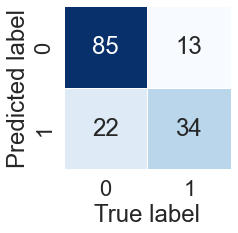

In [45]:
# Plotting a confusion matrix using seaborn and matplotlib
sns.set(font_scale=2)

def plt_conf_mtx(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                    cmap="Blues",
                    linewidths=0.5,
                    linecolor="white")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plt_conf_mtx(y_test, y_preds)

In [46]:
### Classification report for SVC
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.72      0.61      0.66        56

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



## Cross-Validation

Applying cross-validation metrics such as aaccuracy, precision, recall, and F1-score across different data splits

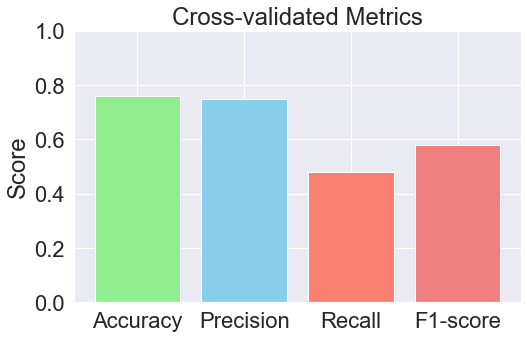

{'Accuracy': 0.7591460826754943,
 'Precision': 0.7496243637382369,
 'Recall': 0.4779175401816911,
 'F1-score': 0.5795127052693401}

In [47]:
# Cross-validating for logistic regression machine-learning algorithm
from sklearn.model_selection import cross_validate
def cross_validate_metrics(clf, X, y, cv=5):
    
    cv_results = cross_validate(clf, X, y, cv=cv,
                               scoring=["accuracy", "precision", "recall", "f1"],
                               return_train_score=False)
    
    metrics = {
        "Accuracy": cv_results['test_accuracy'].mean(),
        "Precision": cv_results['test_precision'].mean(),
        "Recall": cv_results['test_recall'].mean(),
        'F1-score': cv_results['test_f1'].mean()
    }
    
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())
    
    plt.figure(figsize=(8, 5))
    plt.bar(metric_names, metric_values, color=['lightgreen', 'skyblue', 'salmon', 'lightcoral'])
    plt.title("Cross-validated Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()
    
    return metrics

cross_validate_metrics(SVC_model, X, y, cv=5)

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eduar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

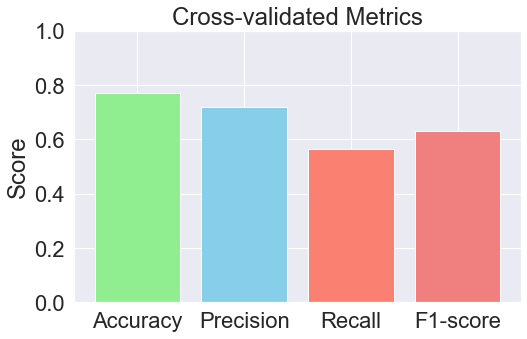

{'Accuracy': 0.7695696460402341,
 'Precision': 0.7182238325877177,
 'Recall': 0.5634521313766596,
 'F1-score': 0.6294528781642184}

In [48]:
cross_validate_metrics(log_reg_model, X, y, cv=5)

In [49]:
print("Best Logistic Regression Model Accurayc: ", gs_log_reg.score(X_test, y_test))
print("Confusion Matrix: ", confusion_matrix(y_test, y_preds))
print("Classification Report: ", classification_report(y_test, y_preds))

Best Logistic Regression Model Accurayc:  0.7597402597402597
Confusion Matrix:  [[85 13]
 [22 34]]
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.72      0.61      0.66        56

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [51]:
from joblib import dump, load

dump(gs_log_reg, filename="gs_log_reg_new.joblib")


['gs_log_reg_new.joblib']

In [52]:
import pickle

pickle.dump(gs_log_reg, open("gs_log_reg_model.pkl", "wb"))